In [200]:
%pip install numpy matplotlib pandas scipy sympy pygasflow shapely


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [201]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym
import pandas as pd
import shapely as sh
from pygasflow import shockwave_solver
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

# 1. Project Description
You are given the task to compare two competitive
systems for thrust delivery in a preliminary design approach. 

One engine under consideration
should be “fictional” (vs. off-the-shelf), whose main attributes are based on your principal design 
requirements from the mission definition (additional “nuts and bolts” stuff to complete the engine 
can be added later, or alluded to more briefly). The second engine should be an off-the-shelf one 
and two engines should be compared in a trade-off study. That is, the differences in performance 
characteristics should be explained based on design inputs of the fictional, i.e., design, engine. 

As an aircraft-based project, you may wish to review (and use) your AER 615 Aircraft Performance
notes to assist in mission definition. Bear in mind, however, that the main emphasis of this project
is on the design and analysis of your propulsion systems, not the whole vehicle.

The design process is broken down into two phases. 
First, you will need to design and optimize a
supersonic inlet for your “fictional” engine using the Oswatisch principle (as explained below), and
after that, you will complete a comprehensive parametric cycle analysis study for performance
parameters. Finally, you will use your findings in your preliminary design. A detailed comparison
of both engines is required.

---

## 1.1. Part I: Supersonic Inlet Design
Your first task is to preliminary design the inlet of your “fictional” engine for high supersonic flight.
In a supersonic intake, the freestream is decelerated to subsonic speed through a suitable shock
system. The number of oblique shocks is a matter of designer choice. Higher flight Mach numbers
require a greater number of oblique shocks.

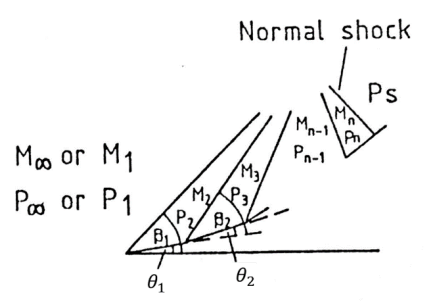

Figure 1. Multi shock compression for Oswatisch optimization (Goldsmith, 1993).


Your primary concern is to optimize the inlet for the pressure recovery ratio ($\pi_𝐝$) across the entire
inlet. According to Oswatitsch’s principle (Oswatitsch, 1947), the pressure recovery in a system of
($n − 1$) oblique shocks followed by the nth normal shock (see Fig. 1) is maximum when the shocks
are of equal strength, i.e., that is upstream Mach numbers normal to the oblique shocks are equal:

$$M_1 sin(\beta_1) = M_2 sin(\beta_2) = ... = M_{n-1} sin(\beta_{n-1})$$

Above equation combined with the oblique shock relations, that are

$M_{downstream} = f(M_{upstream},\gamma,\beta)$
and
$\theta = f(M,\gamma,\beta)$

the resultant system of equations can be numerically solved to calculate for

- $M_1$ to $M_{n-1}$
- $\beta_1$ to $\beta_{n-1}$
- $\theta_1$ to $\theta_{n-1}$
- $\pi_1$ to $\pi_{n-1}$

### 1.1.1. Part I: Project Deliverables 

Your task is to design a **supersonic ramp inlet** that maximizes $\pi_d$. You need to design an optimal
shock system consisting of 3 oblique shocks followed by a normal shock.

**Inputs:**
|||
|---|---|
|Number of shocks | 4 (3 oblique shocks + normal shock) |
|Flight Mach number | $M_1 = 3.2$ |
|The normal shock up-stream Mach number | $(M_n) = 1.3$ |
|Gamma | $\gamma = 1.4$ |


**Outputs:**

Your results should include

|||
|---|---|
|The Mach numbers | ($M_2$ to $M_{n-1}$) | 
|Oblique shockwave angles | ($\beta_1$ to $\beta_{n-1}$) |
|Flow deflection angles | ($\theta_1$ to $\theta_{n-1}$) |
|Stagnation pressure ratios across the individual <br/> oblique shock and the normal shock | ($\pi_1$ to $\pi_n$)|
|The intake pressure recovery ratio | ($\pi_d$)|

You must also include a rendition of the resultant inlet geometry.

### Hints
1) There are multiple solutions to the systems of equations. For example, depending on the initial
guess you can get negative values for Mach numbers. You need to limit your domain to physically
realistic values.
2) You will need to solve several equations simultaneously. However, you do not need to write
code to do this, e.g., see the Matlab fsolve or vpasolve function.

### Notes

- The problem of determining the optimum shock pattern for an
external compression inlet with a given number of shocks,
oblique shocks followed by one terminal normal shock
was solved by Oswatitsch in a 1944 German report (translated
into English in 1947 as a NACA report).
- The result is astonishingly simple. It states that in an optimum
multishock inlet, all shocks need to be of equal strength.
- This that the normal component of Mach number must be the
same for all the oblique shocks.

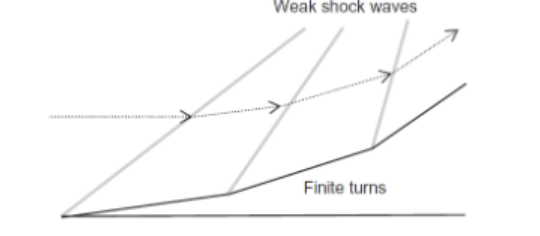


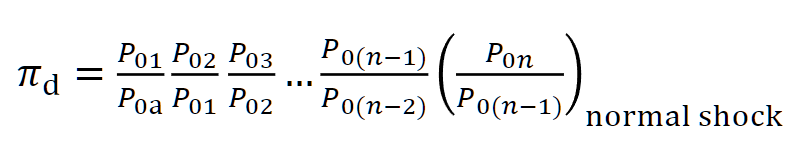

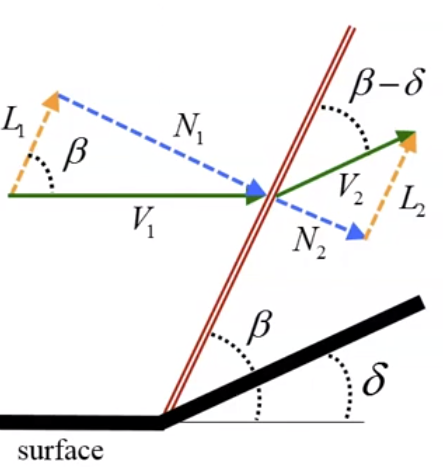

shockwave_solver outputs
|index|varaible|
|---|---|
| 0 | M1 |
| 1 | Mn1 |
| 2 | M2 |
| 3 | Mn2 |
| 4 | beta |
| 5 | theta |
| 6 | p2/p1 |
| 7 | rho2/rho1 |
| 8 | t2/t1 |
| 9 | p02/p01 |

Error in shockwave_solver
Pressure recovery ratio: 0.979374
            obl_1   obl_2   obl_3    norm
M1         3.2000  3.2000  3.2000  1.3000
Mn1        1.0000  1.0000  1.0000  1.3000
M2         3.2000  3.2000  3.2000  0.7860
Mn2        1.0000  1.0000  1.0000  0.7860
beta      18.2101 18.2101 18.2101 90.0000
theta      0.0001  0.0001  0.0000  0.0000
p2/p1      1.0000  1.0000  1.0000  1.8050
rho2/rho1  1.0000  1.0000  1.0000  1.5157
t2/t1      1.0000  1.0000  1.0000  1.1909
p02/p01    1.0000  1.0000  1.0000  0.9794
Error in shockwave_solver


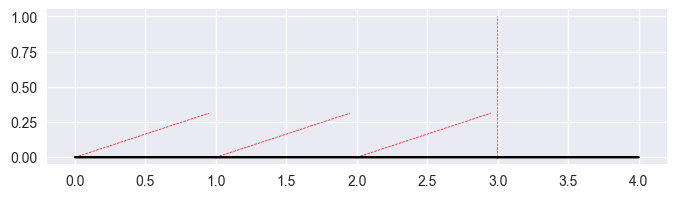

In [300]:
def plot_inlet_recovery(M, pd):
    
    m = np.linspace(1, 5, 100)
    # AIA-Std
    aia = 1 - 0.1*(m-1)**1.5
    plt.plot(m, aia, label="AIA-Standard")

    # MIL-E-5008B 1 < M0 < 5
    mil1 = 1 - 0.075*(m-1)**1.35
    plt.plot(m, mil1, label="MIL-E-5008B 1 < M0 < 5")

    # Normal Shock
    norm_shock = [shockwave_solver("m1", mi)[9] for mi in m]
    plt.plot(m, norm_shock, label="Normal Shock")

    plt.scatter(M, pd, color='black')
    # Label point
    plt.text(M, pd, r"  $\pi_d = {:.6f}$".format(pd), fontsize=11)    

    plt.grid(visible=True)
    plt.legend()
    plt.xlim(1, 5)
    plt.ylim(0.2, 1)
    plt.xlabel("Flight Mach Number")
    plt.ylabel("Shock total pressure recovery")
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    plt.style.use('seaborn-v0_8')
    plt.show()

def plot_inlet(thetas: np.ndarray, betas: np.ndarray):
    # Plot the compression ramp
    fig, ax = plt.subplots()

    # Convert to radians
    thetas = np.radians(thetas)
    betas = np.radians(betas)

    # Set limits
    # ax.set_xlim(-1, 4)
    # ax.set_ylim(-2, 3)
    ax.set_aspect('equal', 'box')

    # Plot triangle with hyp of 1 and angle theta
    # Start next triangle at the end of the previous one
    last_point = [0, 0]
    last_theta = 0
    segment_length = 1
    shock_length = 1
    for theta, beta in zip(thetas, betas):
        # Calculate the next point
        beta += last_theta
        theta = last_theta + theta
        x = last_point[0] + np.cos(theta) * segment_length
        y = last_point[1] + np.sin(theta) * segment_length
        
        # Plot the shock
        ax.plot([last_point[0], last_point[0] + np.cos(beta) * shock_length], [last_point[1], last_point[1] + np.sin(beta) * shock_length], color='red', linestyle='--', linewidth=0.5)
        
        # Plot the triangle
        ax.plot([last_point[0], x], [last_point[1], y], color='black')
        # Update the last point
        last_point = [x, y]
        last_theta = theta




def compute_flow(m1, mn, t1, t2, t3, display=False):

    data = pd.DataFrame({}, index=["M1", "Mn1", "M2", "Mn2", "beta", "theta", "p2/p1", "rho2/rho1", "t2/t1", "p02/p01"])

    try:
        data["obl_1"] = shockwave_solver("m1", m1, "theta", t1)
        data["obl_2"] = shockwave_solver("m1", data["obl_1"]["M2"], "theta", t2)


        # data["obl_3"] = shockwave_solver("m1", data["obl_2"]["M2"], "theta", t3)

        # Use optmise to get the final oblique shock mach number
        def f(M):
            return shockwave_solver("m1", M, "theta", t3, to_dict=True)["m2"]
        
        opt_res = sp.optimize.minimize(lambda x: abs(f(x) - mn), mn, bounds=[(1, 5)], method='L-BFGS-B')
        data["obl_3"] = shockwave_solver("m1", opt_res.x[0], "theta", t3)
        
        data["norm"]  = shockwave_solver("m1", mn)
    except ValueError:
        if display:
            print("Error in shockwave_solver")
        return 0

    pressure_recovery_ratio = np.prod(data.loc["p02/p01"])

    if display:
        print("Pressure recovery ratio: {:.6f}".format(pressure_recovery_ratio))
        print(data)
        # plot_inlet_recovery(m1, pressure_recovery_ratio)
        plot_inlet(data.loc["theta"], data.loc["beta"])
        

    return pressure_recovery_ratio

pressure_recovery_ratio = compute_flow(m1=3.2, mn=1.3, t1=18, t2=18, t3=18, display=True)
# # Brute force
# opt_brute = sp.optimize.brute(lambda x: -compute_flow(m1=3.2, mn=1.3, t1=x[0], t2=x[1], t3=x[2]), ((1, 90), (1, 90), (1, 90)), Ns=10)
# pressure_recovery_ratio = compute_flow(m1=3.2, mn=1.3, t1=opt_brute[0], t2=opt_brute[1], t3=opt_brute[2], display=True)

# L-BFGS-B
opt_res = sp.optimize.minimize(lambda x: -compute_flow(m1=3.2, mn=1.3, t1=x[0], t2=x[1], t3=x[2]), [np.random.randint(1, 90), np.random.randint(1, 90), np.random.randint(1, 90)], bounds=[(1, 89), (1, 89), (1, 89)], method='L-BFGS-B')
pressure_recovery_ratio = compute_flow(m1=3.2, mn=1.3, t1=opt_res.x[0], t2=opt_res.x[1], t3=opt_res.x[2], display=True)

---

## 1.2. Part II: Parametric Cycle Analysis
Apply one-dimensional parametric cycle analysis to calculate the performance parameters of your
“fictional” engine(s). Analyze both engines as part of the supersonic mission requirements and
draw conclusions based on a trade-off study.
### 2. Design Instructions
For the final report, you are encouraged to apply your computer programming and/or spreadsheet
skills in undertaking any parametric study, as evidence of your engineering design selection
process towards the chosen system (where possible, avoid decisions via rough guesses, trial-anderror, intuition, and aesthetics; however, rules of thumb are acceptable as starting points in
design).

Use and apply as many equations as possible from various sources, including your course textbook,
notes, and other literature, as additional evidence of engineering techniques being applied in
system selection. The knowledge you gain from this course should tell you if the numbers these
equations give you are reasonable, or not. Where the respective propulsion system’s performance
seems good, or bad, or unrealistic, objectively discuss the design issues(e.g., as you learned in AER
404 Intro to Aerospace Engineering Design).

The efficiency of components should be chosen based on historical values and from a literature
survey. This part of the analysis is as much a research project as a design project.